In [ ]:
# import numpy as np
import torch
import matplotlib.pyplot as plt
import math

torch.Size([2000]) torch.Size([2000])


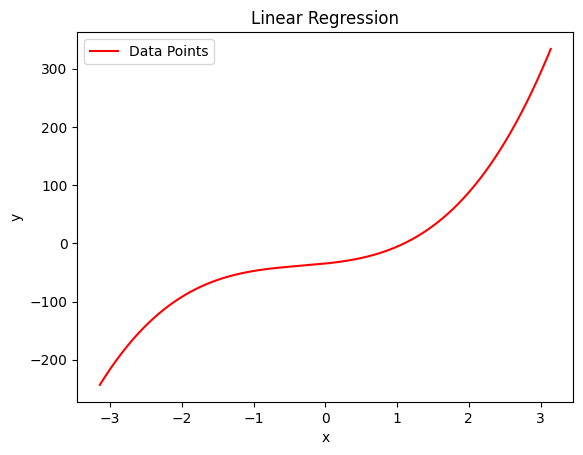

In [ ]:
x = torch.linspace(-math.pi, math.pi,2000)
y = -34.7 + 12.9*x + 8.1145 * x ** 2 + 8 * x ** 3
print(x.shape, y.shape)

plt.plot(x, y, 'r' ,label="Data Points")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

In [ ]:
class CurveFitting:
    def __init__(self):
        self.a = torch.randn(1, requires_grad=True)
        self.b = torch.randn(1, requires_grad=True)
        self.c = torch.randn(1, requires_grad=True)
        self.d = torch.randn(1, requires_grad=True)
        self.lr = 0.001

    def firCurve(self, x, y, epochs=1000):
        optimizer = torch.optim.SGD([self.a, self.b, self.c, self.d], lr=self.lr)
        print("Initial Weights:", self.a, self.b, self.c, self.d)
        for epoch in range(epochs):
            y_pred = self.a + self.b * x + self.c * x**2 + self.d * x**3
            loss = ((y_pred - y) ** 2).mean()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        print("Final Weights:", self.a, self.b, self.c, self.d)

    def predict(self, x):
        # with torch.no_grad():
        y_pred = self.a + self.b * x + self.c * x**2 + self.d * x**3
        return y_pred


In [ ]:
m = CurveFitting()
m.firCurve(x,y)

Initial Weights: tensor([0.0206], requires_grad=True) tensor([1.1385], requires_grad=True) tensor([-0.6393], requires_grad=True) tensor([-0.5895], requires_grad=True)
Final Weights: tensor([-19.8729], requires_grad=True) tensor([9.2248], requires_grad=True) tensor([5.5566], requires_grad=True) tensor([8.5228], requires_grad=True)


In [ ]:
# m.predict(x).numpy()
m.predict(x).detach().numpy()

array([-258.27142, -257.55975, -256.8495 , ...,  326.34763,  327.27704,
        328.20807], dtype=float32)

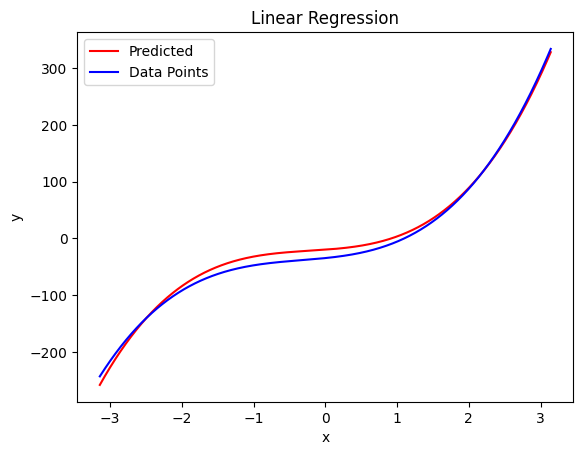

In [ ]:
plt.plot(x, m.predict(x).detach().numpy(), 'r' ,label="Predicted")
plt.plot(x, y, 'b' ,label="Data Points")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression")
plt.legend()
plt.show()

# Observation
---

* using loss.backward() function can help to converge gradient easily .. due to it have some more optimized gradient then us (that we use earlier in lab 1 or 2)

*  torch.optim.SGD() can help to not write the uddate rule for every parameter it take cares automatically

* if learning rate is not choosen properly it can lead to vlaues as NaN (Not a number in python) means it is not converging at that leanrnig rate may be you cna choose some higher nunmber or lower number of learning rate

* it also depends on weight some times changing weights may lead to reduce the loss function more

